## Do your work in a notebook named `explore_telco`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle, prepare, explore

In [2]:
# acquire the train/validate/test splits

train, validate, test = wrangle.wrangle_telco()
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


In [3]:
# add scaled columsn

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']
train, validate, test = prepare.scale_telco(train, validate, test, columns_to_scale)
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690


In [4]:
plt.rc('font',size=13)
plt.rc('figure', figsize=(16,9))

### 1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [29]:
def plot_variable_pairs(df):
    return sns.pairplot(df, kind='reg')

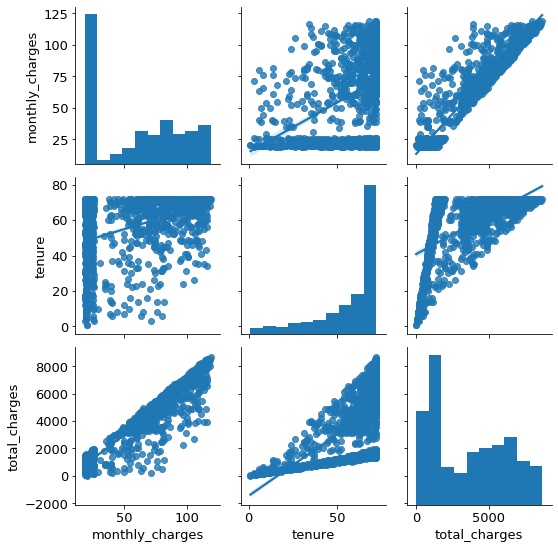

In [30]:
ori_cols = ['monthly_charges', 'tenure', 'total_charges']
df = train[ori_cols]

plot_variable_pairs(df)

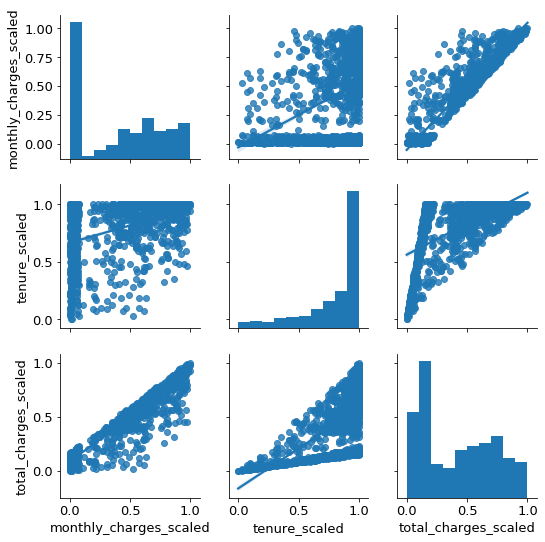

In [7]:
scaled_cols = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled']
df = train[scaled_cols]

plot_variable_pairs(df)

**Takeaways**:
1. The visualization is the same between original data and scaled data. 

### 2. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
def months_to_years(df):
    df['tenure_years'] = (df.tenure/12).round(0)
    return df

In [9]:
months_to_years(train)
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled,tenure_years
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185,1.0
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389,1.0
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526,6.0
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212,5.0
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690,5.0


### 3. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
1. Target var: total_charges
2. features:
    - tenure or tenure_years (cont.)
    - monthly_charges (cont.)

In [10]:
train.tenure_years.value_counts(normalize=True)

6.0    0.470787
5.0    0.206605
4.0    0.135478
3.0    0.070279
2.0    0.060119
1.0    0.044030
0.0    0.012701
Name: tenure_years, dtype: float64

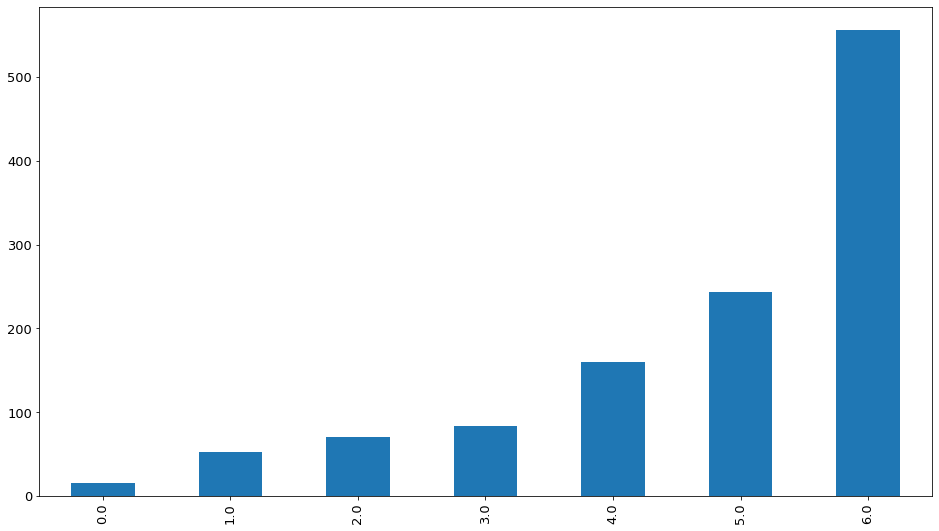

In [11]:
train.tenure_years.value_counts().sort_index().plot.bar()

In [12]:
# Turn tenure_years to a categorical varibale 'tenure_level'

train['tenure_level'] = pd.cut(train.tenure_years, bins=[0,5,10], labels=['silver', 'gold'])
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled,tenure_years,tenure_level
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185,1.0,silver
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389,1.0,silver
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526,6.0,gold
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212,5.0,silver
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690,5.0,silver


In [13]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    plt.subplot(221)
    box = sns.boxplot(data=df, x=categorical, y=continuous)
    plt.subplot(222)
    swarm = sns.swarmplot(data=df, x=categorical, y=continuous)
    plt.subplot(223)
    violin = sns.violinplot(data=df, x=categorical, y=continuous)

In [14]:
train.tenure_level

728     silver
366     silver
262       gold
1629    silver
568     silver
         ...  
450       gold
43        gold
1364    silver
442       gold
147       gold
Name: tenure_level, Length: 1181, dtype: category
Categories (2, object): [silver < gold]

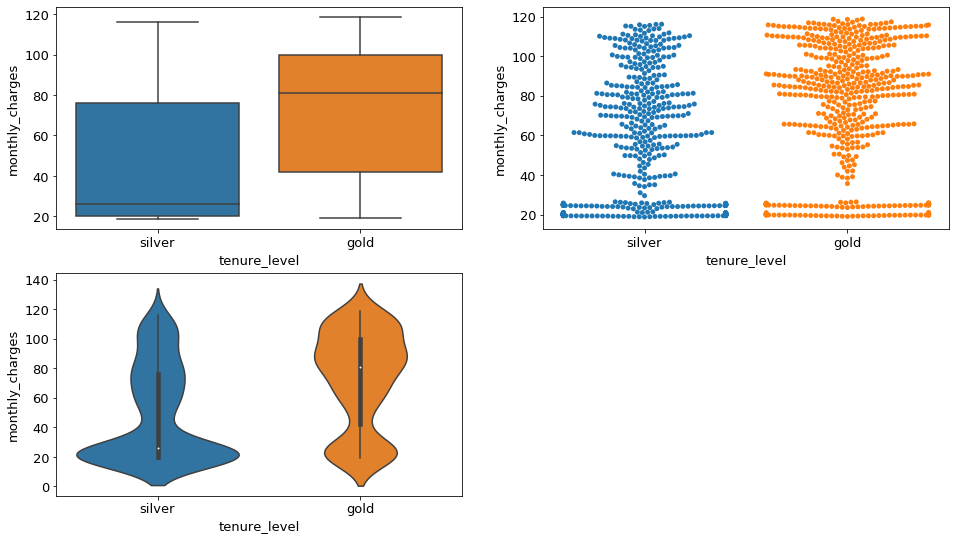

In [15]:
df = train
categorical = 'tenure_level'
continuous = 'monthly_charges'

plot_categorical_and_continuous_vars(df, categorical, continuous)

### 4. Save the functions you have written to create visualizations in a file named `explore.py`. Rewrite your notebook code so that you are using the functions imported from this file.

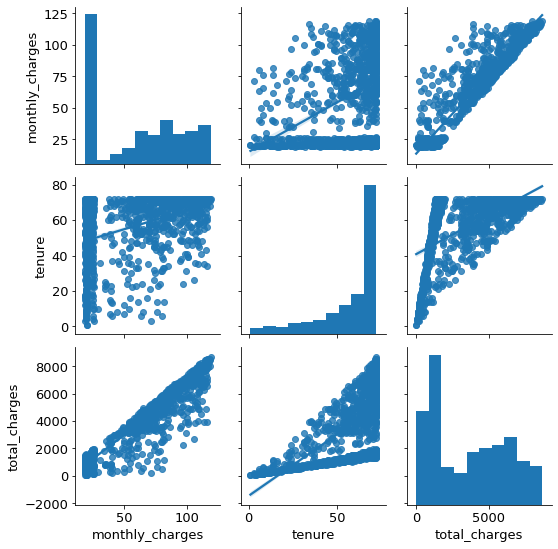

In [16]:
ori_cols = ['monthly_charges', 'tenure', 'total_charges']
df = train[ori_cols]

explore.plot_variable_pairs(df)

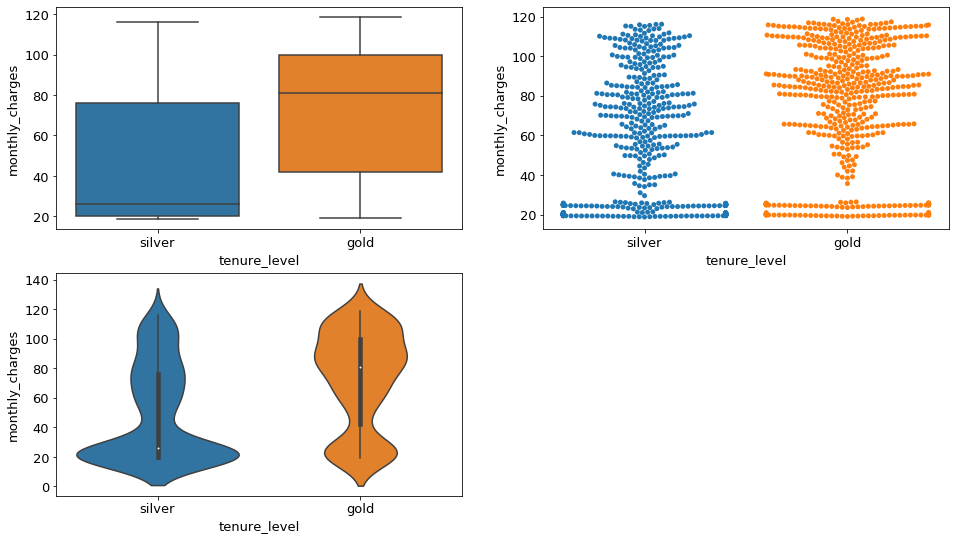

In [17]:
df = train
categorical = 'tenure_level'
continuous = 'monthly_charges'

explore.plot_categorical_and_continuous_vars(df, categorical, continuous)

### 5. Explore your dataset with any other visualizations you think will be helpful.